# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_excel(r'C:\Users\LOQ\Documents\Jupyter\EDA Course\Data\Alarm Survey Data.xlsx')

In [5]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [6]:
df.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [8]:
df['alarm_rating'] = pd.to_numeric(df['alarm_rating'].str.replace(' stars', ''))

In [9]:
df.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating            int64
dtype: object

## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [10]:
df.isna().sum()

survey_id               0
age                     0
number_of_children      0
activity_level          0
sleep_quality         351
number_of_snoozes       0
alarm_rating            0
dtype: int64

In [12]:
df['sleep_quality'].value_counts(dropna= False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [14]:
df['sleep_quality'].fillna(2, inplace= True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_14644\907092816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sleep_quality'].fillna(2, inplace= True)


In [15]:
df['sleep_quality'].value_counts(dropna= False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: count, dtype: int64

## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [16]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


In [17]:
df.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000
mean,3216.302192,29.069175,1.395616,4.110835,1.145811,2.955075
std,1856.007409,7.472048,1.432192,0.963415,1.599481,1.101363
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1609.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3217.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4825.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,19.000000,5.000000


In [18]:
df['number_of_children'].value_counts()

number_of_children
0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.5     204
Name: count, dtype: int64

In [19]:
df['number_of_children'] = np.where(df['number_of_children'] == 5.5, 5, df['number_of_children'])

In [20]:
df['number_of_children'].value_counts()

number_of_children
0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.0     204
Name: count, dtype: int64

In [21]:
df['activity_level'].value_counts()

activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64

In [23]:
df['activity_level'] = np.where(df['activity_level'].isin(['lightly active', 'light_activity']), 'light', df['activity_level'])

In [24]:
df['activity_level'].value_counts()

activity_level
light          3314
active         2450
very active     669
Name: count, dtype: int64

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [25]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6366,6300,31,2.0,active,5.0,0,3
6367,6301,27,2.0,light,4.0,0,2
6368,6302,41,3.0,light,5.0,0,2
6369,6303,25,0.0,light,5.0,0,5
6370,6304,25,1.0,light,5.0,0,2
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,light,4.0,0,4
6430,6364,26,0.0,light,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [26]:
df = df[~df.duplicated()]

## 5. Outliers Check

* Find any outliers
* Deal with the outliers

array([[<Axes: title={'center': 'survey_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'number_of_children'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'number_of_snoozes'}>,
        <Axes: title={'center': 'alarm_rating'}>]], dtype=object)

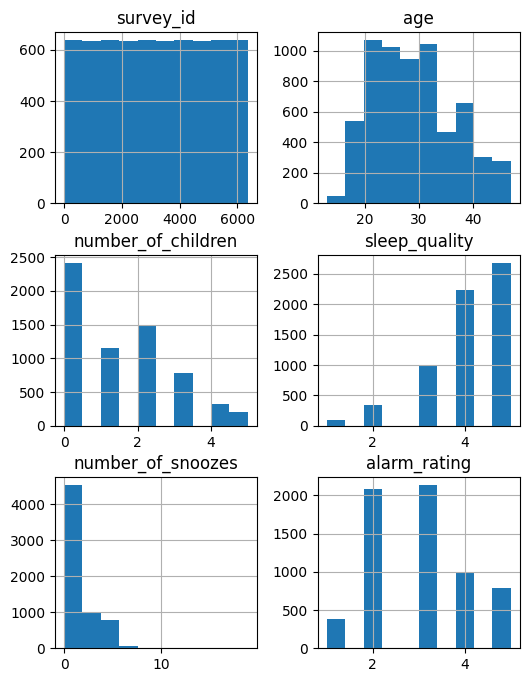

In [28]:
df.hist(figsize= (6,8))

<Axes: xlabel='number_of_snoozes', ylabel='Count'>

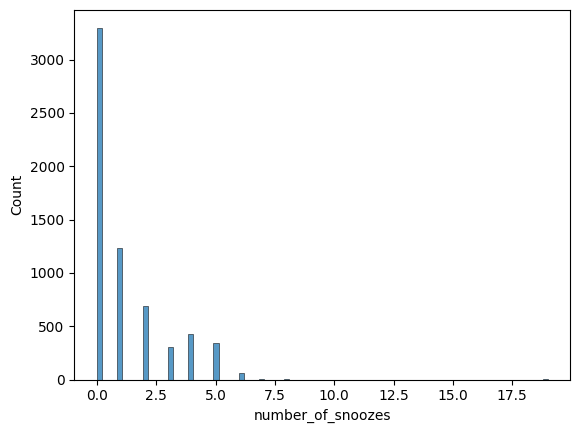

In [29]:
sns.histplot(df['number_of_snoozes'])

<Axes: ylabel='number_of_snoozes'>

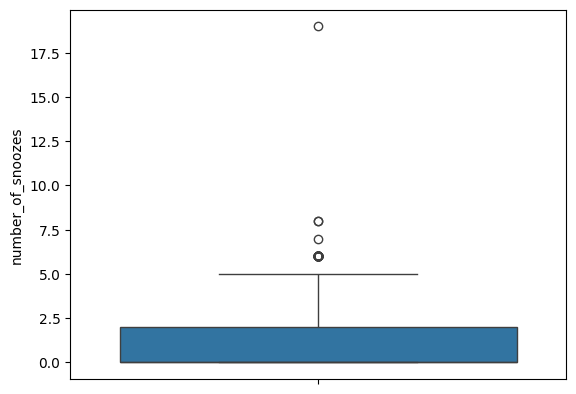

In [30]:
sns.boxplot(df['number_of_snoozes'])

In [31]:
df['number_of_snoozes'].value_counts()

number_of_snoozes
0     3300
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: count, dtype: int64

In [33]:
df = df[df['number_of_snoozes'] < 19]
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,light,4.0,0,4
6363,6364,26,0.0,light,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [35]:
df[df.isna().any(axis= 1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 0 to 6365
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6365 non-null   int64  
 1   age                 6365 non-null   int64  
 2   number_of_children  6365 non-null   float64
 3   activity_level      6365 non-null   object 
 4   sleep_quality       6365 non-null   float64
 5   number_of_snoozes   6365 non-null   int64  
 6   alarm_rating        6365 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 397.8+ KB


In [37]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [ ]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [41]:
pen = pd.read_excel(r'C:\Users\LOQ\Documents\Jupyter\EDA Course\Data\Pen Sales Data.xlsx')

In [42]:
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [43]:
pen.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
dtype: object

In [47]:
pen['Total Spend'] = pen['Pen Cost'] + pen['Shipping Cost']
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98


In [50]:
pen['Free Shipping'] = np.where(pen['Shipping Cost'] == 0.00, 'Yes', 'No')
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [ ]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

In [52]:
pen['Delivery Time'] = pen['Delivery Date'] - pen['Purchase Date'] 
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days


In [53]:
pen['Delivery Time'].mean()

Timedelta('3 days 05:45:36')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [ ]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [55]:
two_col = pen['Review'].str.split('|')
pen[['User Name','Review Text']] = pd.DataFrame(two_col.to_list())
pen.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."


In [ ]:
pen['review'].str.contain('Leak|spill', regex= T)